In [1]:
#!/usr/bin/python
# http://cmdlinetips.com/2011/08/three-ways-to-read-a-text-file-line-by-line-in-python/
## Open the file with read only permit
f = open('trainingdata.txt')

## Read the first line 
T = int(f.readline())

In [2]:
T

5485

In [3]:
response = [None] * T
text = [None] * T 
for i in range(T):
    data = f.readline().split()
    response[i] = int(data[0])
    text[i] = data[1:len(data) -1]

In [4]:
## close the file after reading the lines.
f.close()

In [5]:
import pandas as pd
import numpy as np

In [6]:
d = {'text': text, 'response': response}
df = pd.DataFrame(data=d)

In [7]:
df['response']

0       1
1       2
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      2
15      3
16      4
17      1
18      1
19      1
20      4
21      1
22      1
23      1
24      2
25      1
26      1
27      1
28      1
29      1
       ..
5455    1
5456    2
5457    1
5458    2
5459    2
5460    2
5461    1
5462    2
5463    2
5464    1
5465    1
5466    7
5467    1
5468    1
5469    1
5470    2
5471    8
5472    1
5473    2
5474    1
5475    2
5476    3
5477    1
5478    1
5479    1
5480    1
5481    8
5482    1
5483    8
5484    4
Name: response, dtype: int64

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [10]:
t = df.response.value_counts()
print (t.iloc[0])

2840


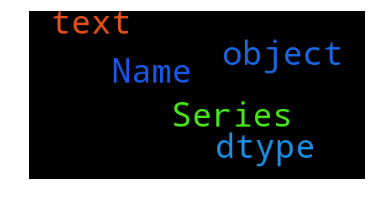

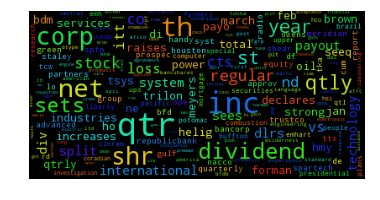

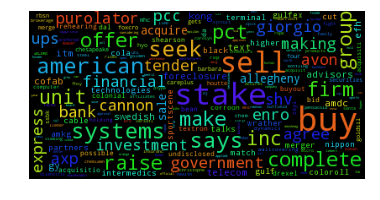

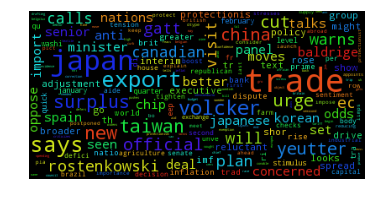

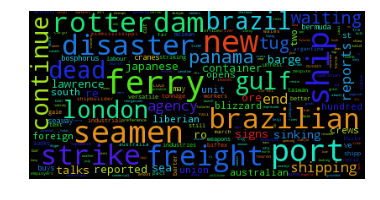

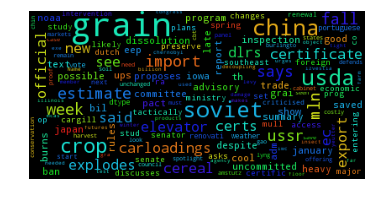

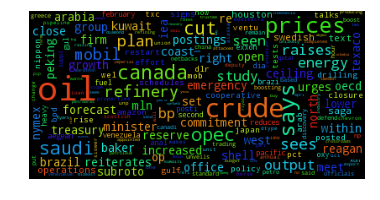

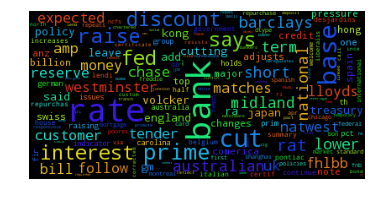

In [11]:
# plot_word_cloud(df_data["review_text"].loc[df_data.review_stars == 1, ])
for i in range(len(t)):
    plot_word_cloud(df["text"].loc[df.response == i])

In [8]:
df.response.value_counts()

1    2840
2    1596
6     253
3     251
8     206
7     190
4     108
5      41
Name: response, dtype: int64

# Analysis:
1) There are stop words.
2) There is one major occupation like banking and then there are country names and sub activities cariied out there
3) There are no numbers
4) Almost everything is lowercase
5) There are no numbers
6) 

In [9]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
### NLP
# The maps have been generated following -
# http://stackoverflow.com/questions/11692199/string-translate-with-unicode-data-in-python
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
remove_number_map = dict((ord(char), None) for char in string.digits)

def remove_numbers_in_string(s):
    '''
    Function to remove numbers in a string.
    Input: string
    Output: string
    '''
#     print(type(s))
    return s.translate(None, string.digits)
#     return s.translate(remove_number_map)

def lowercase_remove_punctuation(s):
    '''
    Function to lowercase string and remove punctuation marks
    Input: string
    Output: string
    '''
    s = s.lower()
    return s.translate(None, string.punctuation)
#     return s.translate(remove_punctuation_map)

# NLTK_STOPWORDS = set(stopwords.words('english'))

import urllib2  # the lib that handles the url stuff

target_url = 'https://raw.githubusercontent.com/stanfordnlp/CoreNLP/master/data/edu/stanford/nlp/patterns/surface/stopwords.txt'
response = urllib2.urlopen(target_url) # it's a file like object and works just like a file

stanford_stopwords = []
for text in response.readlines():
    stanford_stopwords.append(text.strip('\n'))

STANFORD_STOPWORDS = set(stanford_stopwords)    

def remove_stopwords(token_list):
    '''
    Function to remove stopwords. Stopwords list is used from NLTK package.
    Source: 
    https://github.com/kevin11h/YelpDatasetChallengeDataScienceAndMachineLearningUCSD/blob/master/Yelp%20Predictive%20Analytics.ipynb
    Input: string 
    Output: string
    '''    
#     token_list = nltk.word_tokenize(s)
#     exclude_stopwords = lambda token : token not in NLTK_STOPWORDS
    exclude_stopwords = lambda token : token not in STANFORD_STOPWORDS
    return ' '.join(filter(exclude_stopwords, token_list))

def filter_out_more_stopwords(token_list, MORE_STOPWORDS):
    '''
    Function to filter out more stopwords
    Source:
    https://github.com/kevin11h/YelpDatasetChallengeDataScienceAndMachineLearningUCSD/blob/master/Yelp%20Predictive%20Analytics.ipynb
    Input: 
        token_list: list of words
        MORE_STOPWORDS: list of stopwords
    Output: 
        list without stopwords
    '''    
    return filter(lambda tok : tok not in MORE_STOPWORDS, token_list)

def stem_token_list(token_list):
    '''
    Function to stem words
    Input: list 
    Output: list 
    '''    
    STEMMER = PorterStemmer()
#     return [STEMMER.stem(tok.decode('utf-8')) for tok in token_list]
    return [STEMMER.stem(tok) for tok in token_list]

def restring_tokens(token_list):
    '''
    Function to convert the the tokenized words to string
    Input: list
    Output: string
    '''    
    return ' '.join(token_list)

def remove_stop_words_and_restring_and_lowercase_and_remove_punctuation_and_remove_numbers(token_list):
    '''
    Function to lowercase, remove punctuation, remove numbers, stem each token in a string
    Input: string
    Output: string
    '''    
    s = remove_stopwords(token_list)
    s = remove_numbers_in_string(s)
    s = lowercase_remove_punctuation(s)
#     return s
    token_list = nltk.word_tokenize(s)
#     #token_list = filter_out_more_stopwords(token_list)
    token_list = stem_token_list(token_list)
    return restring_tokens(token_list)

In [11]:
STANFORD_STOPWORDS

{'!',
 '!!',
 '!?',
 '"',
 '#',
 '###',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'ll",
 "'m",
 "'s",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '-lrb-',
 '-lsb-',
 '-rrb-',
 '-rsb-',
 '.',
 '..',
 '...',
 ':',
 ';',
 '<',
 '>',
 '?',
 '?!',
 '??',
 '@',
 '[',
 ']',
 '^',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'arent',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'cant',
 'could',
 "couldn't",
 'couldnt',
 'did',
 "didn't",
 'didnt',
 'do',
 'does',
 "doesn't",
 'doesnt',
 'doing',
 "don't",
 'dont',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'hadnt',
 'has',
 "hasn't",
 'hasnt',
 'have',
 "haven't",
 'havent',
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'heres',
 'hers',
 'herself',
 'hes',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'hows',
 

In [11]:
df_preprocessed = df.copy();
% time df_preprocessed['text'] = df['text'].apply(\
                            remove_stop_words_and_restring_and_lowercase_and_remove_punctuation_and_remove_numbers)

Wall time: 6.43 s


<b>Without any pre processing</b>

In [12]:
df_preprocessed = df.copy();
df_preprocessed['text'] = df['text'].apply(restring_tokens)

In [13]:
print df_preprocessed.text[0]

champion products ch approves stock split champion products inc said its board of directors approved a two for one stock split of its common shares for shareholders of record as of april the company also said its board voted to recommend to shareholders at the annual meeting april an increase in the authorized capital stock from five mln to mln shares


In [13]:
# t = df_preprocessed.response.value_counts()
# for i in range(len(t)):
#     plot_word_cloud(df_preprocessed["text"].loc[df_preprocessed.response == i])

In [19]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
vectorizer_train = CountVectorizer(analyzer = "word",
                                 tokenizer = None,
                                 preprocessor = None,
                                 ngram_range = (1, 1),
                                 strip_accents = 'unicode',
                                 max_features = 100
                            )

In [21]:
feature_matrix_train = vectorizer_train.fit_transform(df_preprocessed.text)

In [69]:
feature_matrix_train

<5485x1000 sparse matrix of type '<type 'numpy.int64'>'
	with 181693 stored elements in Compressed Sparse Row format>

In [27]:
y = np.array(df_preprocessed.response.copy(), dtype='int32')

In [119]:
def mySVC(feature_matrix_train, y_train, feature_matrix_test, y_test):
    '''
    Function to apply SVC from sklearn to build model on train data and get accuracy on test and train data
    Input:
        feature_matrix_train: numpy.ndarray
        y_train: numpy.ndarray
        feature_matrix_test: numpy.ndarray
        y_test: numpy.ndarray
    Output:
        list: [train_accuracy, test_accuracy]
    '''
    clf = SVC()
    clf.fit(feature_matrix_train, y_train)  #.set_params(kernel='linear')
    
    clf2_predictions = clf.predict(feature_matrix_train)
    train_accuracy = str(metrics.accuracy_score(y_train, clf2_predictions))

    clf_predictions = clf.predict(feature_matrix_test)
    test_accuracy = str(metrics.accuracy_score(y_test, clf_predictions))
    
    return [train_accuracy, test_accuracy]

def myKFoldSVM(X, y, n_fold):
    '''
    Function to divide data into k folds and apply SVC from sklearn to 
    build model on train data and prints accuracy on test and train data. 
    Input:
        X: numpy.ndarray
        y: numpy.ndarray
        n_fold: numpy.ndarray
    Output:
        Prints train and test accuracy for each of the kfold and the average accuracy 
    '''
    res_svc_train = []
    res_svc_test = []
    res_svc_train_avg = 0.0
    res_svc_test_avg = 0.0
    kf = KFold(X.shape[0], n_folds=n_fold)
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        res_svc = mySVC(X_train, y_train, X_test, y_test)
        
        res_svc_train_avg = res_svc_train_avg + float(res_svc[0])
        res_svc_test_avg = res_svc_test_avg + float(res_svc[1])
        
        res_svc_train.append(res_svc[0])
        res_svc_test.append(res_svc[1])
        
    res_svc_train_avg = res_svc_train_avg / n_fold
    res_svc_test_avg = res_svc_test_avg / n_fold
    
    print "SVC training accuracy: " + str(res_svc_train)
    print "SVC training average accuracy: " + str(res_svc_train_avg)
    print "SVC test accuracy:" + str(res_svc_test)
    print "SVC test average accuracy: " + str(res_svc_test_avg)

In [120]:
%time myKFoldSVM(feature_matrix.toarray(), y, 5)

SVC training accuracy: ['0.927301731996', '0.934594348222', '0.926845943482', '0.930036463081', '0.934822242479']
SVC training average accuracy: 0.930720145852
SVC test accuracy:['0.943482224248', '0.892433910665', '0.944393801276', '0.878760255242', '0.875113947129']
SVC test average accuracy: 0.906836827712
Wall time: 1min 38s


In [121]:
%time mySVC(feature_matrix.toarray(), y, feature_matrix.toarray(), y)

Wall time: 37.6 s


['0.935095715588', '0.935095715588']

<b>Feature matrix with no maximum feature limit ~ 15k</b>

In [97]:
y = np.array(df_preprocessed.response.copy(), dtype='int32')
%time myKFoldSVM(feature_matrix.toarray(), y, 5)

SVC training accuracy: ['0.784412032817', '0.794895168642', '0.781677301732', '0.794895168642', '0.790793072015']
SVC training average accuracy: 0.78933454877
SVC test accuracy:['0.843208751139', '0.727438468551', '0.849589790337', '0.730173199635', '0.737465815861']
SVC test average accuracy: 0.777575205105
Wall time: 41min 25s


In [98]:
%time mySVC(feature_matrix.toarray(), y, feature_matrix.toarray(), y)

Wall time: 16min 33s


['0.805651777575', '0.805651777575']

# READ TEST DATA

In [14]:
f = open('testdata.txt')

## Read the first line 
N = int(f.readline())
 
ip_text = [None] * N

In [15]:
for i in range(N):
    ip_text[i] = f.readline()

In [16]:
f.close()

In [17]:
df_test = pd.DataFrame({'text' : ip_text})

In [78]:
test = pd.DataFrame({'word' : vectorizer_train.vocabulary_.keys() , 'count' : vectorizer_train.vocabulary_.values()})

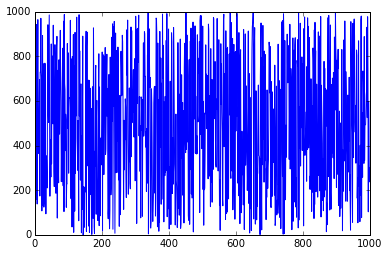

In [86]:
test['count'].plot()

In [22]:
vectorizer_test = CountVectorizer(analyzer = "word",
                                 tokenizer = None,
                                 preprocessor = None,
                                 ngram_range = (1, 1),
                                 strip_accents = 'unicode',
                                 max_features = 100,
                                 vocabulary = vectorizer_train.vocabulary_
                            )

In [23]:
feature_matrix_test = vectorizer_test.fit_transform(df_test.text)

In [24]:
feature_matrix_test

<6x100 sparse matrix of type '<type 'numpy.int64'>'
	with 130 stored elements in Compressed Sparse Row format>

In [34]:
def mySVC(feature_matrix_train, y_train, feature_matrix_test):
    '''
    Function to apply SVC from sklearn to build model on train data and get results on test data
    Input:
        feature_matrix_train: numpy.ndarray
        y_train: numpy.ndarray
        feature_matrix_test: numpy.ndarray
        y_test: numpy.ndarray
    Output:
        list: [train_accuracy, test_accuracy]
    '''
    clf = SVC()
    clf.set_params(kernel='linear')
    clf.fit(feature_matrix_train, y_train)  #

    clf_predictions = clf.predict(feature_matrix_test)
    
    for val in clf_predictions:
        print str(val)

In [35]:
%time mySVC(feature_matrix_train, y, feature_matrix_test)

1
1
8
1
4
4
Wall time: 1.98 s


In [32]:
from sklearn.naive_bayes import *

def myNB(feature_matrix_train, y_train, feature_matrix_test):
    '''
    Function to apply SVC from sklearn to build model on train data and get results on test data
    Input:
        feature_matrix_train: numpy.ndarray
        y_train: numpy.ndarray
        feature_matrix_test: numpy.ndarray
    Output:
        list: [train_accuracy, test_accuracy]
    '''
    bernoulli_nb_classifier = BernoulliNB()
    bernoulli_nb_classifier.fit(feature_matrix_train, y_train)
    
    bernoulli_nb_prediction = bernoulli_nb_classifier.predict(feature_matrix_test)
    
    for val in bernoulli_nb_prediction:
        print str(val)

y = np.array(df_preprocessed.response.copy(), dtype='int32')        
%time myNB(feature_matrix_train, y, feature_matrix_test)

1
1
3
1
7
3
Wall time: 6 ms
